In [1]:
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

import warnings 
warnings.simplefilter('ignore')

from proj2_helpers import *
from get_embeddings_ML import *

### DATA LOADING

In [2]:
DIM_EMB = 20

In [3]:
COOC_PATH = './Results/cooc.pkl'
VOC_PATH = './Results/vocab.pkl'
EMBEDDINGS_PATH = './Results/embeddings.npy'
RESULT_POS_PATH = './Results/pp_pos_otpl_nd.txt'
RESULT_NEG_PATH = './Results/pp_neg_otpl_nd.txt'

In [4]:
#load pickle files
cooc_matrix = open_pickle_file(COOC_PATH)
vocabulary = open_pickle_file(VOC_PATH)

# load numpy files 
embeddings = np.load(EMBEDDINGS_PATH)

# load the data files = list with each line being a tweet
result_pos = open(RESULT_POS_PATH, "r").read().splitlines()
result_neg = open(RESULT_NEG_PATH, "r").read().splitlines()

### EXTRACTING MEAN WORD VECTOR ON TRAIN SETS 

In [5]:
full_df, X, y = process_train_ML(result_pos, result_neg, vocabulary, embeddings, DIM_EMB)

> process pos and neg datas to get X and y to perform ML
> extracting mean of word vectors
> extracting mean of word vectors
> X and y informations:
X shape: (173211, 20)
y shape: (173211,)


In [6]:
# check full_df
full_df.head()

,Sentiment,Tweet,Token_idx,Words_Vectors,Mean_Word_Vector
147433,-1,jakdjfiekrb llookololollilololloolahhahahaah s...,"[70, 153, 72, 43, 34]","[[0.003642823390512998, 0.005394791249566722, ...","[-0.004397644960120166, 0.25574623182815653, 0..."
64027,1,mao dint say mad hate intend honestly opinion ...,"[131, 393, 19, 342, 77, 3336, 901, 1668, 23, 6...","[[0.3467194198466407, -0.5675544513276719, -0....","[0.24967995200149984, 0.01875153420202026, -0...."
112321,-1,lol nothing capital,"[8, 184, 2619]","[[0.0933014423351884, 0.2565771837810636, 0.17...","[-0.35962708197807086, -0.11551506496490209, 0..."
59152,1,finish polish piano,"[300, 2186, 2052]","[[-1.3390706625611073, -0.23074007833481763, -...","[-0.5810102191418206, 0.11676813482743227, 0.6..."
116892,-1,money try,"[285, 66]","[[0.18573586713262988, 0.2320613939777014, -0....","[0.37664911997687434, -0.04074976508762827, -0..."


### PCA ON TRAIN SETS

In [7]:
scaler = MinMaxScaler(feature_range=[0, 1])

In [8]:
X_rescaled = scaler.fit_transform(X)

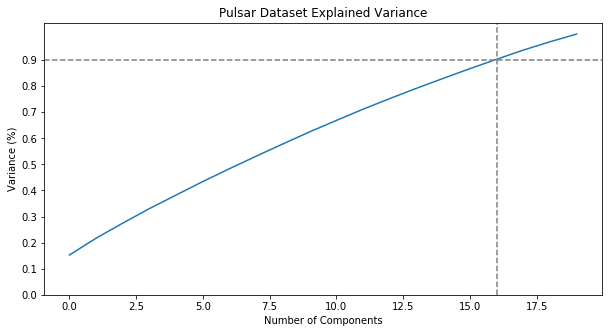

In [9]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
fig = plt.figure(figsize=(10,5))
x=np.cumsum(pca.explained_variance_ratio_)
plt.plot(x)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.yticks(np.arange(0, 1, 0.1))
plt.axhline(y=0.9,color='gray',linestyle='--')
plt.axvline(x=16,color='gray',linestyle='--')
plt.show()

We see that we have selecting 16 components we can preserve something around 90% of the total variance of the data.

In [10]:
pca = PCA(n_components=16)
dataset = pca.fit_transform(X_rescaled)

### TRYING SVM FITTING

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, random_state=0)

In [12]:
clf = MLPClassifier(solver='adam', alpha=1e-4, 
                     hidden_layer_sizes=(2, 16), random_state=4, verbose=False, learning_rate='constant')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

In [14]:
accuracy

0.5907673833221717

### EXTRACTING MEAN WORD VECTOR ON TEST SETS

In [15]:
RES_PATH = './Results/pp_test_otpl.txt'
test_set = open(RES_PATH, "r").read().splitlines()

In [16]:
test_df, X_test = process_test_ML(test_set, vocabulary, embeddings, DIM_EMB)

> process test data to get X_test and perform ML
> extracting mean of word vectors
> X_test informations:
X_test shape: (10000, 20)


In [17]:
# check full_df
test_df.head()

,Tweet_submission_id,Tweet,Token_idx,Words_Vectors,Mean_Word_Vector
0,1,sea doo pro sea scooter sport portable sea doo...,"[1080, 2079, 487, 1080, 4060, 436, 1953, 1080,...","[[0.05158963813757297, 0.6781468996605737, 0.9...","[-0.10496181848914964, 0.4119806442015578, 0.0..."
1,2,shuck well work week come cheer put battery ca...,"[7244, 22, 28, 78, 17, 460, 156, 377, 6802]","[[-1.964357932232306, -0.6532326614409995, 1.1...","[-0.1128173180802276, 0.15274609546806145, 0.1..."
2,3,stay away bug that baby,"[163, 171, 1375, 166, 76]","[[-0.15648611549527638, 0.4243422381533018, 0....","[0.0516271705271963, 0.15064011258872687, 0.05..."
3,4,madam lol perfectly fine contagious anymore mao,"[2301, 8, 2870, 301, 6481, 241, 131]","[[1.04641716287068, 1.437551778546295, 0.47460...","[-0.18122458119427837, 0.08436115955538172, 0...."
4,5,whenever fall asleep watch always wake headache,"[1113, 331, 604, 42, 63, 223, 817]","[[0.5508442356920994, -1.057080660186159, -0.3...","[0.17526036896882685, 0.012836109258537636, -0..."


### MINMAXSCALER AND PCA ON TEST SETS

In [18]:
test_rescaled = scaler.fit_transform(X_test)

In [19]:
pca = PCA(n_components=16)
test= pca.fit_transform(test_rescaled)

In [20]:
clf = MLPClassifier(solver='adam', alpha=1e-4, 
                     hidden_layer_sizes=(2, 16), random_state=4, verbose=False, learning_rate='constant')
clf.fit(dataset, y)
y_pred = clf.predict(test)

In [21]:
len(y_pred)

10000

### CREATE A SUBMISSION

In [22]:
test_id = test_df['Tweet_submission_id'].to_numpy()

In [23]:
len(test_id)

10000

In [24]:
create_csv_submission(test_id,y_pred, "./Submissions/NN_SUB.csv")